# Model configuration summary

**Control run name**: Southern Shelf  + Drake Passage

**Perturbation run name**: Southern Shelf + Drake Passage + Northern Weddell Ridge

**Key**:<br/>
SS: Southern Shelf<br/>
DP: Drake Passage<br/>
NWR: Northern Weddell Ridge<br/>

**Note**: The goal here is to isolate the impact of the northern Weddell Ridge

**Model Config**:<br/>

|       Parameter      |      Value     |                    Description                    |
|:--------------------:|:--------------:|:-------------------------------------------------:|
|         $L_x$        |     4000 km    |                 Zonal domain dize                 |
|         $L_x$        |     2500 km    |               Meridonial domain size              |
|          $H$         |     4000 m     |                   Maximum ocean depth             |
| $\Delta x, \Delta y$ |   $\sim$10 km  |                Horizontal grid spacing            |
|      $\Delta t$      |      617 s     |                   Time step size                  |
|      $\Delta z$      |   5$-$200 m    |                 vertical grid spacing             |
|         $L_r$        |     100 km     |    Meridional width of northern<br>sponge layer   |
|       $\tau_r$       |     7 days     | Relaxation time scale of<br>northern sponge layer |
|    $\Theta_{AABW}$   | -1 $^{\circ}$C |             Temperature of AABW source            |
|      $X_{AABW}$      |     -500 km    |        Location of AABW source<br>on shelf        |
|   $\Delta X_{AABW}$  |     400 km     |          Width of AABW source<br>on shelf         |
|   (To be continued)  |                |                                                   |

# Analysis set-up

In [1]:
import numpy as np
import helper_functions as hf
import plot_functions as pf
import matplotlib.pylab as plt
import overturning_funcs as of
import imp
import xarray as xr
import os
imp.reload(hf)
imp.reload(pf)
imp.reload(of)


# Set directory
exp_dir = '/central/groups/AndyThompsonGroup/earlew/MITgcm_PG/experiments/'  # For HPC
#exp_dir = '/Users/ewilson/research/modeling/MITgcm_PG/experiments'  # Office iMac mirror
hf.set_exp_dir(exp_dir)

# define general plotting and analysis parameters
exp_names = ['gyre_ctrl_run_128n_SS_WAP_DP', 'gyre_ctrl_run_128n_50yr_SS_WAP_DP_NWR']
exp_names_alias = ['SS+DP', 'SS+DP+NWR']
fz = 14  # fontsize
tr = [190, 200] # year range for averaging

# Bathymetry and forcing

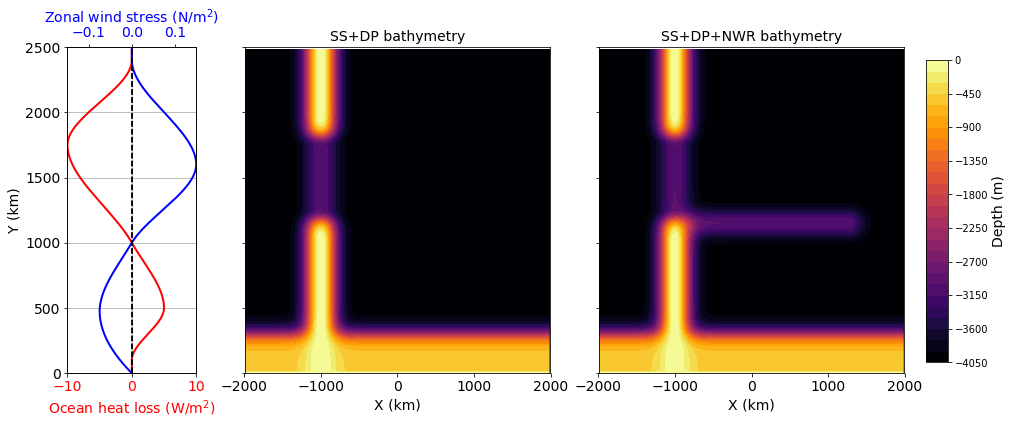

In [3]:
imp.reload(pf)
pf.plot_bathy_tau_surfq_v2(exp_names, exp_names_alias, fz=14, save_plots=True)

In [6]:
##--------Uncomment below to get bathymetry map without forcing------------##
# imp.reload(pf)
# pf.plot_bathy_2D(exp_names, exp_names_alias)

In [7]:
##--------Uncomment below to get 3D bathymetry plots------------##
#imp.reload(pf)
#pf.plot_bathy_3D(exp_names_list, exp_names_alias, save_plots=False)

# Accessment of model equilibrium

### Domain-averaged temperature

computing domain-average temps. May take a while...
Loading gyre_ctrl_run_128n_SS_WAP_DP...
Loading gyre_ctrl_run_128n_50yr_SS_WAP_DP_NWR...


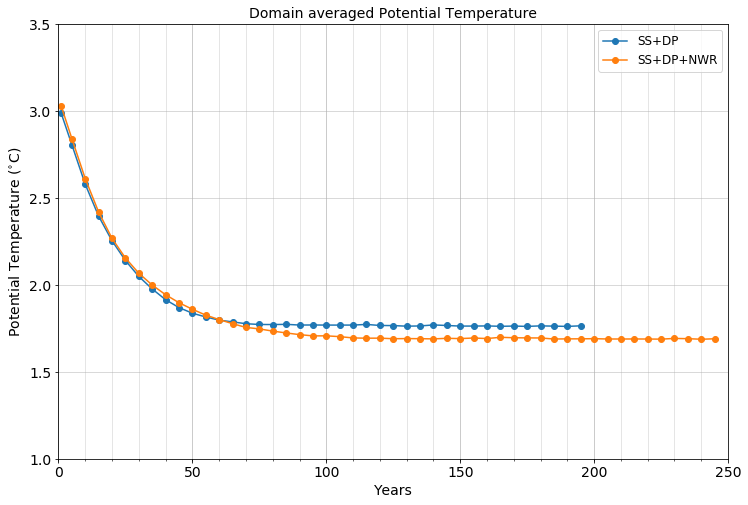

In [5]:
imp.reload(pf)
pf.plot_mean_temp_series(exp_names, exp_names_alias, suppress_err_msg=True)

The above plot shows the domain averaged temperature timeseries for both experiments. Each point represents the instantaneous temperature average. By this metric, both model runs appear to stabilize after roughly 100 years, with the `SS+DP+NWR` run asymptoting towards a slightly cooler equilibrium temperature.

### Domain-averaged bottom temperature

computing domain-average temps. May take a while...
Loading gyre_ctrl_run_128n_SS_WAP_DP...
Loading gyre_ctrl_run_128n_50yr_SS_WAP_DP_NWR...


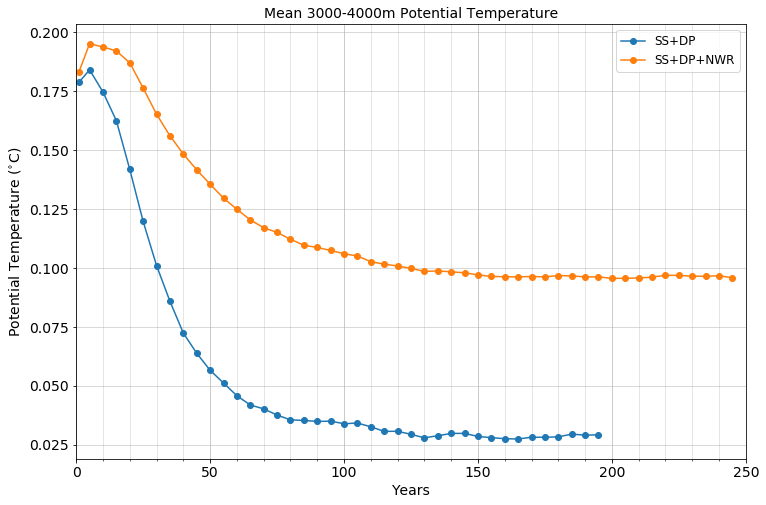

In [6]:
imp.reload(pf)
pf.plot_mean_temp_series(exp_names, exp_names_alias=exp_names_alias, zr=[-4000, -3000], suppress_err_msg=True)

Likewise, we observe that bottom temperatures in both runs are close to equilibrium. **However, in this case, the `SS+DP+NWR` run has warmer bottom temperatures.** This discrepancy is explored in more detail later on.

### Domain-averaged kinetic energy

computing domain-average temps. May take a while...
Loading gyre_ctrl_run_128n_SS_WAP_DP...
Loading gyre_ctrl_run_128n_50yr_SS_WAP_DP_NWR...


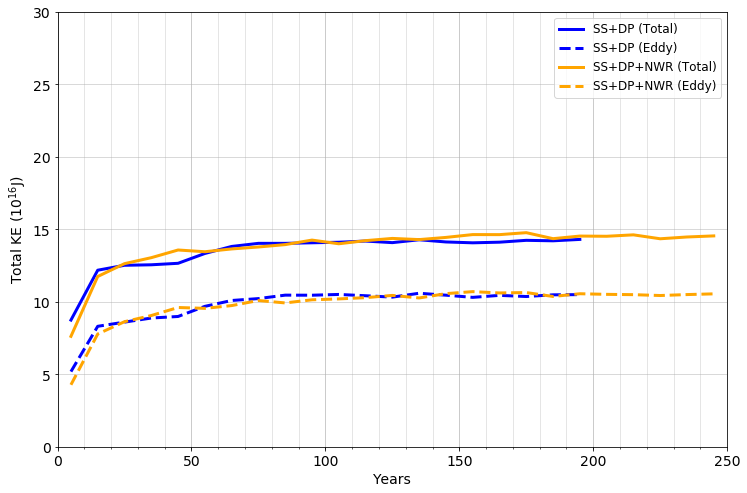

In [11]:
imp.reload(pf)
pf.plot_TKE_series(exp_names, exp_names_alias, tstep=2, suppress_err_msg=True)

Like the domain averaged temperature, the total KE of both runs appear to plateau after approximtely 100 years. In this case, the total KE of both runs asymptote towards similar values. In summary, we have high confidence that these runs have reached a quasi-equilibrium.

# Layer-averaged properties 

The plots below represent an average of the most recent 10 years (relative to the shorter time series).

### Near-surface temperature

Loading THETA for years 190-200...
Loading THETA for years 190-200...


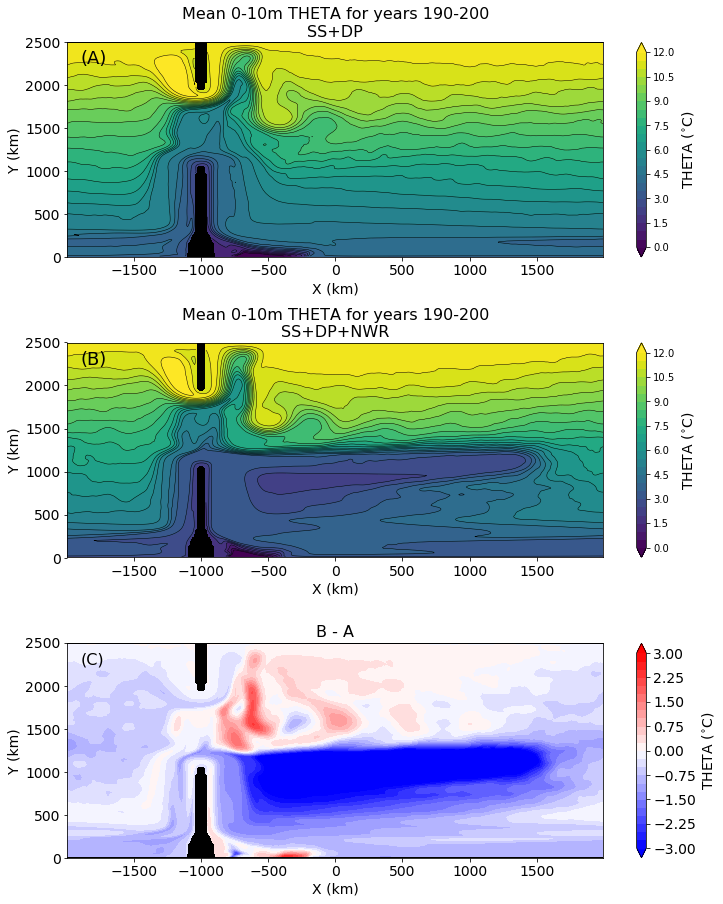

In [12]:
imp.reload(hf)
imp.reload(pf)
zr = [0, 10]
clvls = np.arange(-0, 12.01, 0.5)
clvls_ano = np.arange(-3.0, 3.1, 0.25)
vname = 'THETA'
pf.plot_layer_avg_anom(exp_names, vname, tr, zr, 
                       exp_names_alias=exp_names_alias, clvls=clvls, clvls_ano=clvls_ano, fz=14)

In the above figure, plots (A) and (B) show the upper 10 m temperature for years 190–200. Plot (C) shows the difference between (B) and (A). Here it is evident that the addition of the northern Weddell ridge (NWR) led to substantial upper ocean cooling south of the ridge. This intense cooling is likely indicative of enhanced upwelling.

**Note:** I'm not quite why the edges of the landmasses are tapered near the Drake Passage in the `SS+DP` run. I don't think this had any major effect but I will remedy this for future runs.

In [13]:
##------------uncomment below for temp average between 200-400 m----------------##
# imp.reload(hf)
# imp.reload(pf)
# zr = [200, 400]
# clvls = np.arange(-0, 10.01, 0.5)
# clvls_ano = np.arange(-3.0, 3.1, 0.25)
# vname = 'THETA'
# pf.plot_layer_avg_anom(exp_names, vname, tr, zr, 
#                        exp_names_alias=exp_names_alias, clvls=clvls, clvls_ano=clvls_ano, fz=14)

### Bottom temperatures

Loading THETA for years 190-200...
Loading THETA for years 190-200...


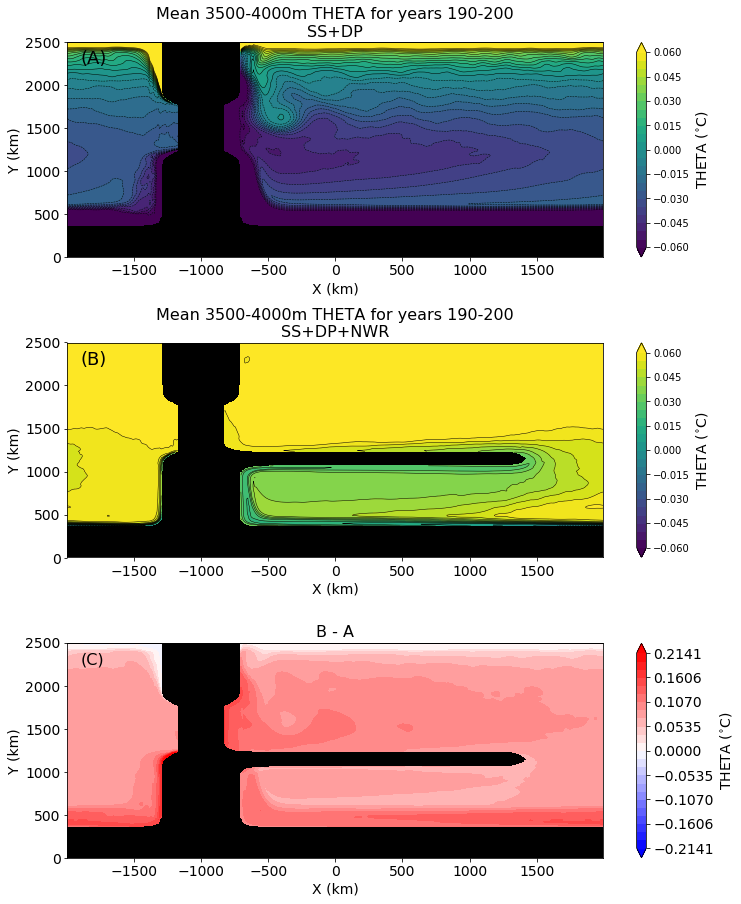

In [14]:
##------------uncomment below for temp average between 3500-4000 m----------------##
imp.reload(hf)
imp.reload(pf)
zr = [3500, 4000]
clvls = np.arange(-0.06, 0.061, 0.005)
clvls_ano = []
vname = 'THETA'
pf.plot_layer_avg_anom(exp_names, vname, tr, zr, 
                       exp_names_alias=exp_names_alias, clvls=clvls, clvls_ano=clvls_ano, fz=14)

Interestingly, the strong near-surface cooling observed in the `SS+DP+NWR` run does not lead to cooler abyssal temperatures. Instead, we observe that the bottom water is notably warmer and largely confined to the Weddell Sea. **This indicates that the production of bottom water is much weaker in the `SS+DP+NWR` run**. It is also possible that the NWR enhances the transformation of bottom water into lighter density classes.

### Sea surface height

Loading PHIHYD for years 190-200...
Loading PHIHYD for years 190-200...
Loading THETA for years 190-200...


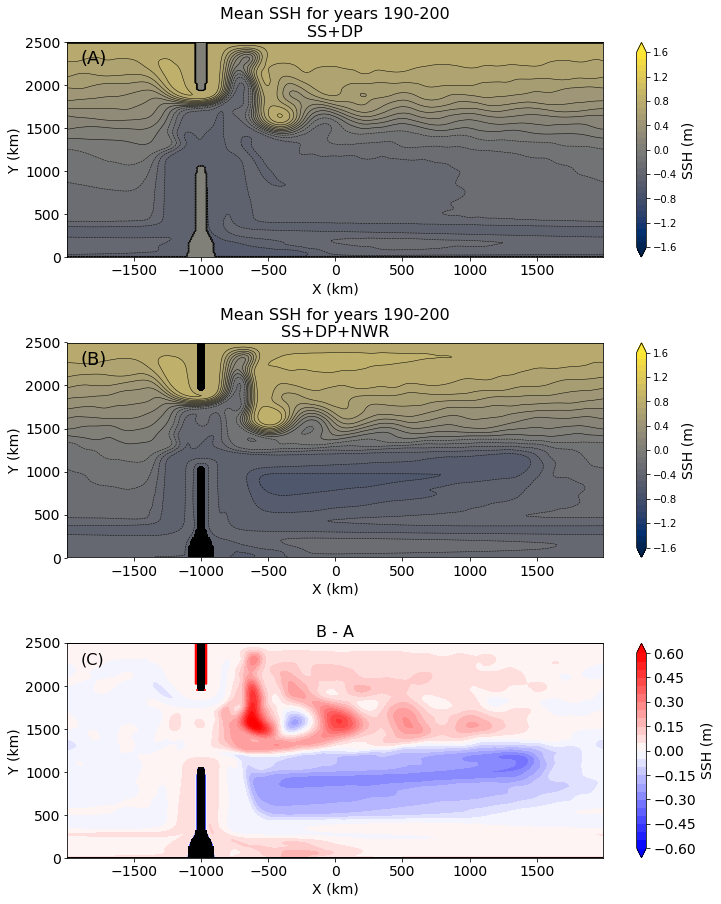

In [19]:
imp.reload(hf)
imp.reload(pf)
zr = [0, 10]
clvls = np.arange(-1.6, 1.61, 0.1)
clvls_ano = np.arange(-0.6, 0.61, 0.05)
vname = 'SSH'
pf.plot_layer_avg_anom(exp_names, vname, tr, zr, exp_names_alias=exp_names_alias, 
                       clvls=clvls, clvls_ano=clvls_ano, cmap=plt.cm.cividis, fz=14)

The presence of the NWR strengthens the cyclonic Weddell gyre, which depresses SSH in that region. Additonally, the presence of the ridge produces a positive SSH anomaly to its north, which would imply anomalous convergence and downwelling.

# Zonal sections

### Zonal velocity across the "Atlantic" sector

Loading UVEL for years 190-200...
Loading UVEL for years 190-200...


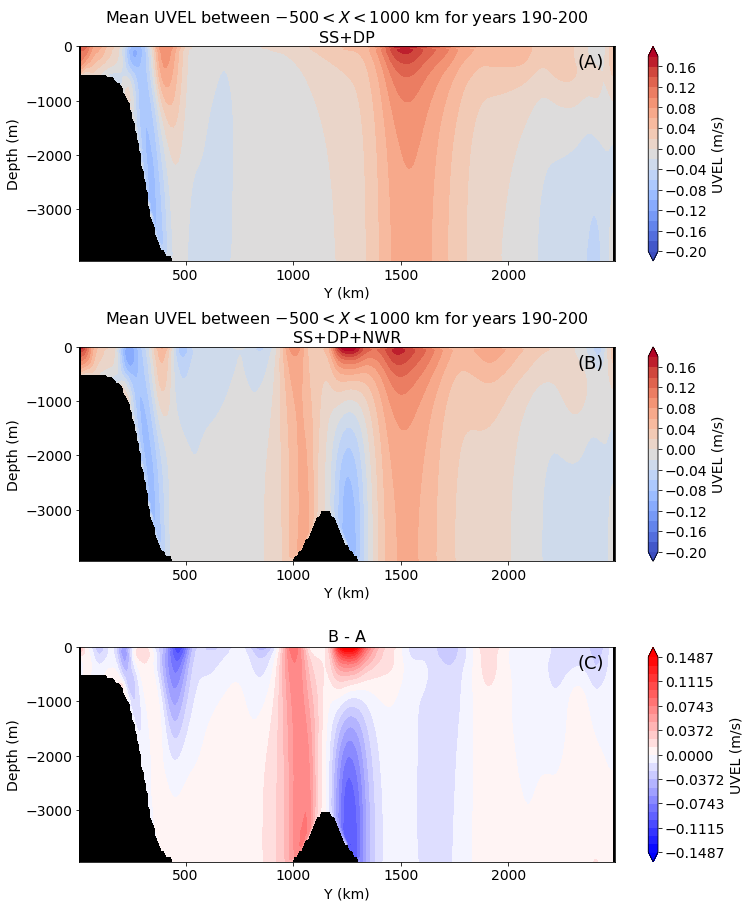

In [32]:
imp.reload(pf)
imp.reload(hf)
#tr = [89, 91]
xr = [-500e3, 1000e3]
clvls = np.arange(-0.2, 0.2, 0.02)
vname = 'UVEL'
pf.plot_zonal_sect_anom(exp_names, vname, tr, xr, exp_names_alias=exp_names_alias, 
                        clvls=clvls, clvls_ano=[], cmap=plt.cm.coolwarm, fz=14)

The above plot shows the latitude-depth section of zonal velocities, averaged between $-500<X<1000$ km. As expected, the largest differences occur in the vicinity of the ridge, which induces a westward flow along its northern slope and an eastward flow along its southern flank. Interestingly, the zonal flow above the northern slope has a much stronger vertical shear.

In [24]:
##------------uncomment below to show meridional velocities across the atlantic sector----------------##
# imp.reload(pf)
# imp.reload(hf)
# #tr = [89, 91]
# xr = [-500e3, 500e3]
# clvls = np.arange(-0.05, 0.05, 0.005)
# vname = 'VVEL'
# pf.plot_zonal_sect_anom(exp_names, vname, tr, xr, exp_names_alias=exp_names_alias, 
#                         clvls=clvls, clvls_ano=[], cmap=plt.cm.coolwarm, fz=14)

### Temperature stratification across the "Atlantic" sector

Loading THETA for years 190-200...
Loading THETA for years 190-200...


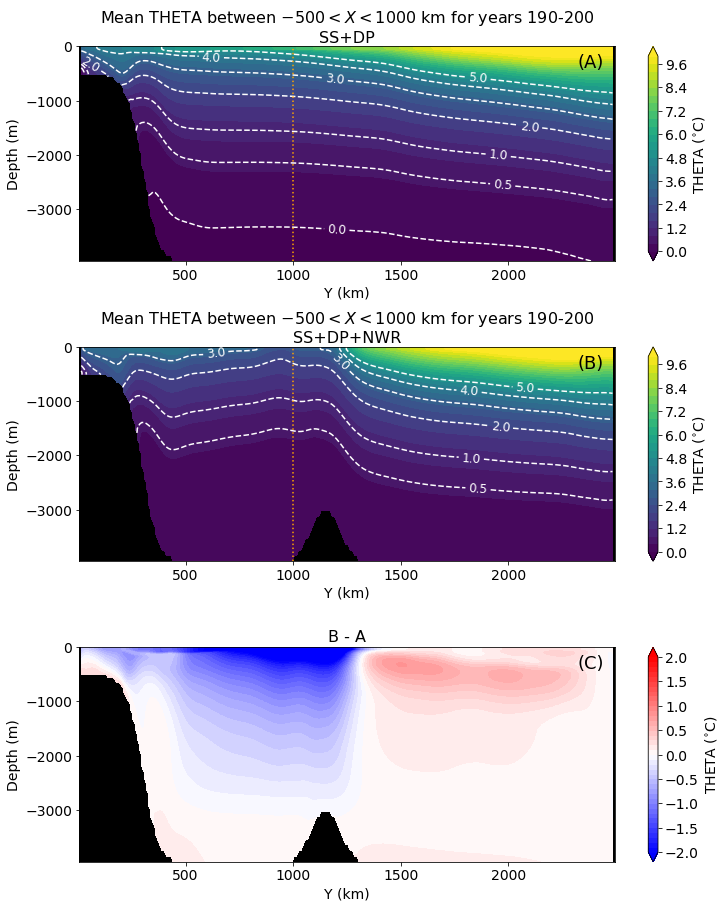

In [33]:
imp.reload(hf)
imp.reload(pf)

#tr = [89, 91]
xr = [-500e3, 1000e3]
clvls = np.arange(-0, 10.01, 0.4)
clvls_ano = np.arange(-2, 2.1, 0.1)
vname = 'THETA'
pf.plot_zonal_sect_anom(exp_names, vname, tr, xr, clvls=clvls, exp_names_alias=exp_names_alias, 
                        clvls_ano=clvls_ano, cmap=plt.cm.viridis, fz=14)

The above plot shows the latitude-depth section of potential temperature for the same section as before. Here, it is evident that the cooling south of ridge extends throughout most of the water column. Further north, a slight warming is evident in the upper 2000 m, which is consistent with the inferred downwelling anomaly in this region. As illustrated before, the cooling over the upper Weddell gyre coincides with a slight warming of the abyssal layers.

The orange vertical line demarcates where the surface heat fluxes change sign; north of this line, the surface layers receive a net warming. **In (B), we observe that a larger fraction of deep water upwells in a region of net heating**. 

### Temperature stratification across the "Pacific" sector

Loading THETA for years 190-200...
Loading THETA for years 190-200...


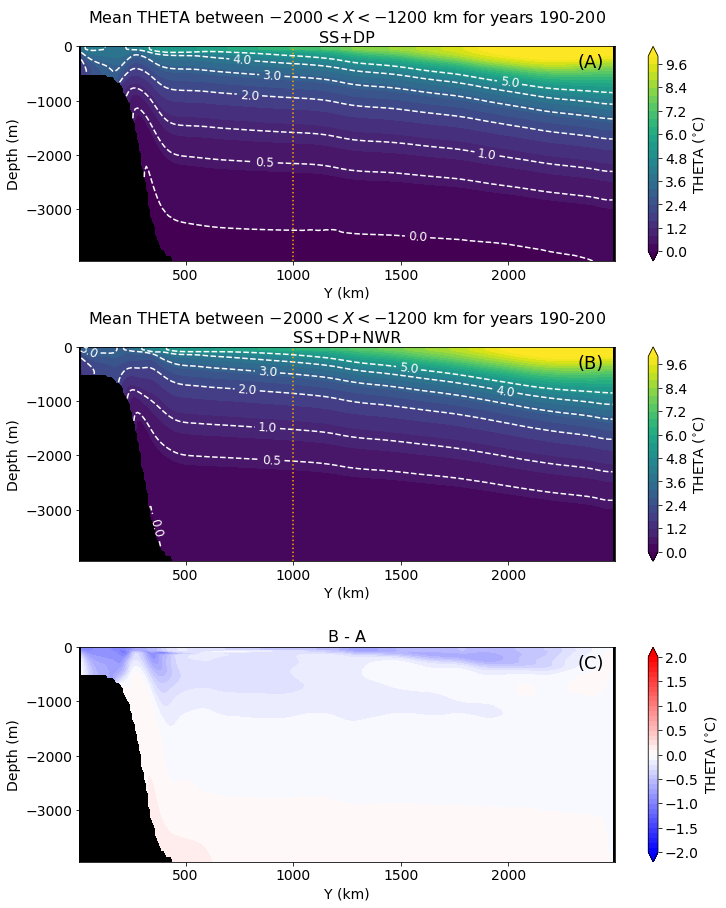

In [34]:
imp.reload(hf)
imp.reload(pf)

xr = [-2000e3, -1200e3]
clvls = np.arange(-0, 10.01, 0.4)
clvls_ano = np.arange(-2, 2.1, 0.1)
vname = 'THETA'
pf.plot_zonal_sect_anom(exp_names, vname, tr, xr, clvls=clvls, exp_names_alias=exp_names_alias, 
                        clvls_ano=clvls_ano, cmap=plt.cm.viridis, fz=14)

In the Pacific sector, between $-500<X<1000$km, the changes in stratification are more muted, with cooling in the upper 1000 m and warming in the abyssal ocean. *This implies that the presence of the ridge in the Atlantic leads to large zonal asymmetries in deep water upwelling and surface watermass transformation.*

# Overturning circulation

In [37]:
##------------uncomment below to compute overturning streamfunctions----------------##
# imp.reload(of)
# of.calcOverturning(exp_names[0], tr)
# of.calcOverturning(exp_names[1], tr)

### Residual overturning in z-coordinates

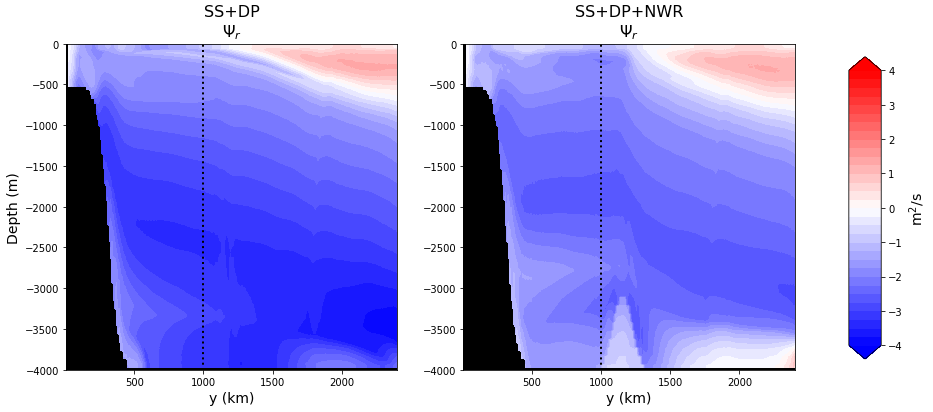

In [9]:
imp.reload(of)
imp.reload(pf)

clvls = np.arange(-4, 4.1, 0.25)
pf.plot_psi_z_comp(exp_names, tr, exp_names_alias=exp_names_alias, clvls=clvls, plot_mode=0)

The above plots show the zonally-integrated, residual overturning circulation $\Psi_r$ for both runs. Here, the dotted vertical line demarcates where surface heat changes sign. This comparison reveals that the addition of the ridge leads to a substantial weakening of the lower overturning cell. Consistent with the temperature sections, a larger fraction of the lower overturning cell outcrop in regions that have net surface warming. Thus, *the presence of the northern Weddell ridge restricts the supply of deep water to the continental shelf.* That said, the strength of the upper cell is similar in both cases.

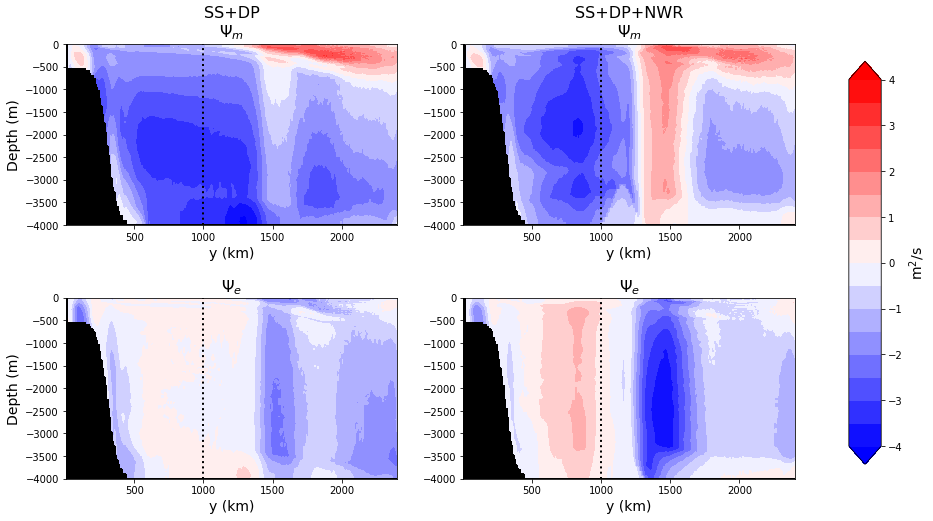

In [7]:
clvls = np.arange(-4, 4.1, 0.5)
#tr = [200, 210] # year range for averaging
pf.plot_psi_z_comp(exp_names, tr, exp_names_alias=exp_names_alias, clvls=clvls, plot_mode=1)

Decomposing $\Psi_r$ into its mean $\Psi_m$ and $\Psi_e$ components reveals strikingly different overturning structures. As expected, the largest disparties occur near the NWR, which spans $1000<Y<1300$ km. In the `SS+DP+NWR` run, a narrow clockwise overturning cell appears in the $\Psi_m$ field just north of the ridge. This is opposed by a stronger counter-rotating eddy overturning cell. 

South of $Y=1200$km, in the latitudes of the Weddell Sea, we observe that the core of $\Psi_m$ is slighly shoaled in the `SS+DP+NWR` case. $\Psi_e$ is much stronger in the Weddell region when the ridge is present. The clockwise tendency of $\Psi_e$ in this region is consistent with the isotherms sloping downwards, towards the continent.

### Residual overturning in temperature-coordinates

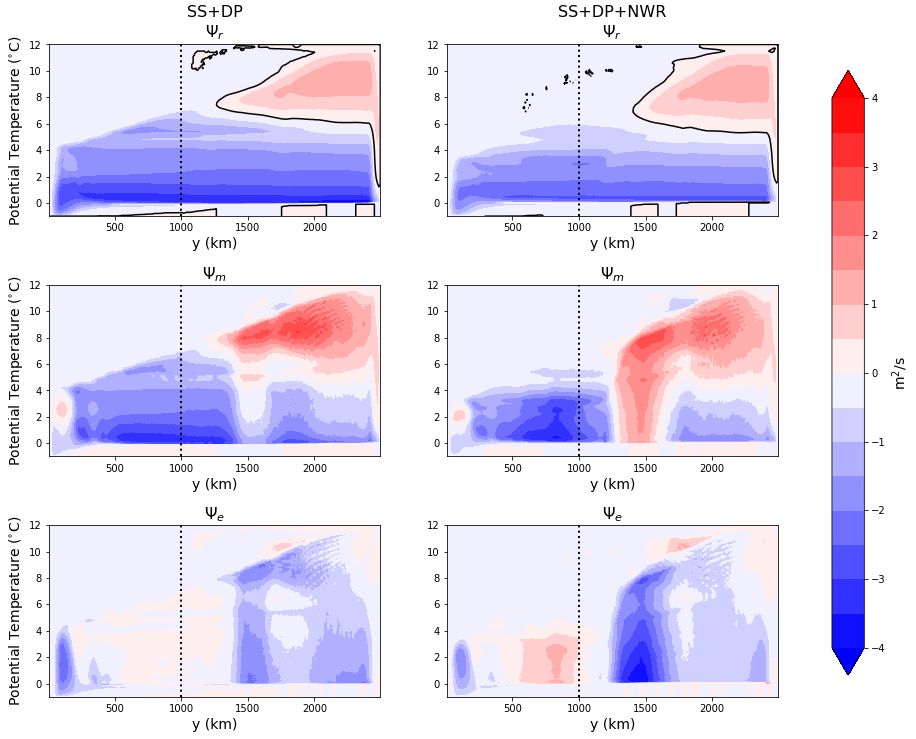

In [11]:
imp.reload(of)
imp.reload(pf)
clvls = np.arange(-4, 4.1, 0.5)
pf.plot_psi_pt_comp(exp_names, tr, exp_names_alias=exp_names_alias,clvls=clvls)

The above plots show the overturning streamfunction in temperature-space. As before, the vertical dashed line demarcates where the surface heating switches sign. In the top plots, the black contour outlines the zero contour. Consistent with the previous plots, we see that the lower (anti-clockwise) overturning cell of $\Psi_r$ is weaker and occupies a slightly narrower temperature range...

## Miscellaneous code formating (ignore)

In [2]:
%%html
<style>
table {float:left}
</style>